## Performing DA and Control Simulation Experiments (CSE)

##### Loading Python Modules:

In [3]:
import numpy as np
import pickle
import random
import sys
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from class_Lorenz63 import run_RK4
from class_state_vec import state_vector
from class_obs import obs_da
from class_da_sys import da_system


#### Defining lorenz63 model:

In [4]:
sigma = 10.0       # Parameter sigma
rho   = 28.0       # Parameter rho
beta  = 8.0 / 3.0  # Parameter beta

def lorenz63(state, t):
        """
        Calculates the derivatives for the Lorenz63 system.
        
        Parameters:
        state: vector [x, y, z] representing the current state.
        t: current time (not used in Lorenz63 but included for compatibility).
        
        Returns:
        A vector of derivatives [dx/dt, dy/dt, dz/dt].
        """
        x, y, z = state  # Unpack the state vector
        dx = sigma * (y - x)              # Equation for dx/dt
        dy = x * (rho - z) - y            # Equation for dy/dt
        dz = x * y - beta * z             # Equation for dz/dt
        return np.array([dx, dy, dz])     # Return the derivative vector

#### Load the DA system object:

In [134]:
#-----------------------------------------------------------
# Reading da system object:
#-----------------------------------------------------------
name   = 'x_analysis'
infile = name + '_init.pkl'
das    = da_system()
das    = das.load(infile)

print(das)

DA System Object
xdim:  3
ydim:  3
x0:  [ 8.20747939 10.0860429  23.86324441]
t0:  0
dt:  0.01
t:  0
acyc_step:  8
dtau:  0.08
fcst_step:  8
fcst_dt:  0.01
B: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
R: 
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
H: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
state_vector: 
lorenz63_run
Number of states and parameters
3
Parameters:
[]
Number of parameters:
0
Initial condition:
[-5.6784855   1.74220421 -0.50894036]
Number of states:
3
Trajectory:
[[ 8.20747939  8.39809589  8.59182394 ... -4.9986383  -4.69976127
  -4.4329259 ]
 [10.0860429  10.31905559 10.5401999  ... -1.85089003 -1.87383032
  -1.92237055]
 [23.86324441 24.07111655 24.31175358 ... 27.47111935 26.83733919
  26.21667603]]
EnsTrajectory:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]


#### Initialize the Ensemble:

In [135]:
#-----------------------------------------------------------
# Initializing ensemble:
#-----------------------------------------------------------
xa    = das.x0
Xa    = das.initEns(xa, mu = das.ens_bias_init, sigma = das.ens_sigma_init, edim = das.edim, separate = 'no')


print('Ensemble dimension: ', das.edim)
print('Initial bias: ', das.ens_bias_init)
print('Initial standard deviation: ', das.ens_sigma_init)
print('xa: ')
print(xa)
print('Xa: ')
print(Xa)

Ensemble dimension:  3
Initial bias:  0
Initial standard deviation:  1.4142135623730951
xa: 
[ 8.20747939 10.0860429  23.86324441]
Xa: 
[[ 8.84809326  9.35790455  6.41644037]
 [12.87474221  8.01874806  9.36463844]
 [25.42312345 22.95083842 23.21577135]]


#### Get the Nature Run Trajectory:

In [136]:
sv       = das.getStateVector()
x_nature = sv.getTrajectory()

print('x_nature: ')
print(x_nature)

x_nature: 
[[ 8.20747939  8.39809589  8.59182394 ... -4.9986383  -4.69976127
  -4.4329259 ]
 [10.0860429  10.31905559 10.5401999  ... -1.85089003 -1.87383032
  -1.92237055]
 [23.86324441 24.07111655 24.31175358 ... 27.47111935 26.83733919
  26.21667603]]


#### Get the observations via the obs_da object:

In [137]:
obs   = das.getObsData()
y_obs = obs.getVal()
y_pos = obs.getPos()
y_err = obs.getErr()


print('y_obs: ')
print(y_obs)
print('y_obs shape: ', y_obs.shape)
print('y_pos: ')
print(y_pos)
print('y_pos shape: ', y_pos.shape)
print('y_err: ')
print(y_err)

y_obs: 
[[ 7.61809479  8.31852258  5.57078645 ... -7.5718385  -3.11120615
  -4.50616334]
 [ 9.24075185  8.88610517  9.5023434  ... -0.88219755 -0.5128387
  -1.37760787]
 [24.58586441 24.89554633 22.98834913 ... 26.27103631 27.59656942
  25.42050374]]
y_obs shape:  (3, 8000000)
y_pos: 
[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [2 2 2 ... 2 2 2]]
y_pos shape:  (3, 8000000)
y_err: 
[0]


#### Initialize timesteps:

In [138]:
#-----------------------------------------------------------
# Initialize the timesteps:
#-----------------------------------------------------------

t_nature = sv.getTimes()

acyc_step = das.acyc_step
dtau      = das.dtau
dt_output = das.dt 
fcst_step = das.fcst_dt
fcst_dt   = das.fcst_dt
maxit     = das.maxit
xdim      = das.xdim
ydim      = das.ydim


print('t_nature: ')
print(t_nature)

t_nature: 
[0.000000e+00 1.000000e-02 2.000000e-02 ... 7.999997e+04 7.999998e+04
 7.999999e+04]


#### Choose DA method:

In [139]:
#-----------------------------------------------------------
# Choose DA method:
#-----------------------------------------------------------
method = das.getMethod()

print('Method: ', method)

Method:  EnKF


In [140]:
import pickle
with open("change_region_time.txt", "rb") as fp:   # Unpickling
    change_region_time = pickle.load(fp)

change_region_time[1]-change_region_time[0]

#########

p = 0
slected_change_region_time = []

for i in range(len(change_region_time)):
    if change_region_time[i] < 500:
        continue
        
    #if change_region_time[i]-change_region_time[i-1] > 337:
    if change_region_time[i]-change_region_time[i-1] > 385:
        slected_change_region_time.append(change_region_time[i])
        #plt.plot(i, change_region_time[i]-change_region_time[i-1], linestyle = 'None', marker = '.')
        p = p + 1
        
print('p =', p)


#########

t_start_series =[]
for point in slected_change_region_time:
    if point%1 ==0:
        t_start_series.append(point)
        if len(t_start_series)>99:
            break

print('t_start_series: ', t_start_series)
t_start_series[40:41]
#t_start_series[40:80]


#########


for t_start in t_start_series[40:41]:
    print('t_start: ', t_start)
    multiple_number = 4 #this is the  parameter before To in the paper 
    position = int(np.ceil(75.1*multiple_number))
    x_original = x_nature[:,(t_start - position)-(t_start - position)%acyc_step]
    obs_original = y_obs[:,(t_start - position)-(t_start - position)%acyc_step]
    print('t_start: ', position, t_start - position, (t_start - position)%acyc_step)
    experiment_step = 1000
    evo_history = np.zeros((3,experiment_step*acyc_step+1))
    no_ch_bkp = np.zeros((experiment_step, das.xdim, das.edim))   # change the last dimension
    evo_history[:,0] = x_original

print(int(8000/0.01))
print('x_nature shape: ', np.shape(x_nature))
print('obs shape: ', np.shape(obs_original))

print(evo_history[:,0])

p = 3273
t_start_series:  [5052, 10257, 11307, 17060, 19038, 20219, 22853, 26152, 28714, 30300, 31946, 35822, 36723, 38589, 44155, 50880, 54153, 54957, 55965, 56716, 57206, 62053, 62729, 69124, 72284, 75221, 78013, 79564, 82094, 82781, 84054, 84547, 86080, 87040, 89476, 91403, 92814, 96186, 98299, 105565, 106069, 107043, 109371, 111261, 112987, 114146, 122065, 124720, 125339, 125854, 126902, 128058, 130718, 132342, 133311, 138699, 140562, 144953, 147614, 149418, 150056, 150796, 152308, 155048, 155666, 162753, 164411, 168461, 172109, 173399, 173894, 175011, 179671, 184480, 197270, 199278, 200712, 201304, 208511, 209397, 212990, 217283, 221215, 226293, 227812, 228641, 232635, 234185, 235306, 236684, 237192, 237614, 241474, 243131, 243598, 244216, 245713, 249389, 250531, 252026]
t_start:  106069
t_start:  301 105768 0
800000
x_nature shape:  (3, 8000000)
obs shape:  (3,)
[ 8.01616968  3.56871156 31.47173769]


In [223]:
# Create the RK4 solver:
solver = run_RK4(lorenz63, sigma, beta, rho, evo_history[:,0] , 0.01, 80)

# Run the solver:
no_control = solver.run(evo_history[:,0],np.arange(0,80,0.01),np.arange(0,80,0.01))
#no_control = no_control.y

print('no_control: ', no_control)
print('no_control: ', no_control[0:5000,0])

print(np.shape(evo_history[:,0]))


Number of steps:  8000
Integration step size:  0.01
Final time:  80
len(initial_state):  3
Running Solve IVP
Initial conditions:  [ 8.01616968  3.56871156 31.47173769]
Time interval:  [0.000e+00 1.000e-02 2.000e-02 ... 7.997e+01 7.998e+01 7.999e+01]
Output times:  [0.000e+00 1.000e-02 2.000e-02 ... 7.997e+01 7.998e+01 7.999e+01]
no_control:  [[ 8.01616968  3.56871156 31.47173769]
 [ 7.57876099  3.28551493 30.9068696 ]
 [ 7.15888733  3.06083803 30.32392176]
 ...
 [-0.04973761  3.32074705 25.14901234]
 [ 0.269105    3.29120446 24.4906639 ]
 [ 0.5554972   3.27444925 23.85957585]]
no_control:  [ 8.01616968  7.57876099  7.15888733 ... -4.97109896 -5.19184237
 -5.43178595]
(3,)


#### Reproducing Figure 1 (Miyoshi et al.,. 2022):

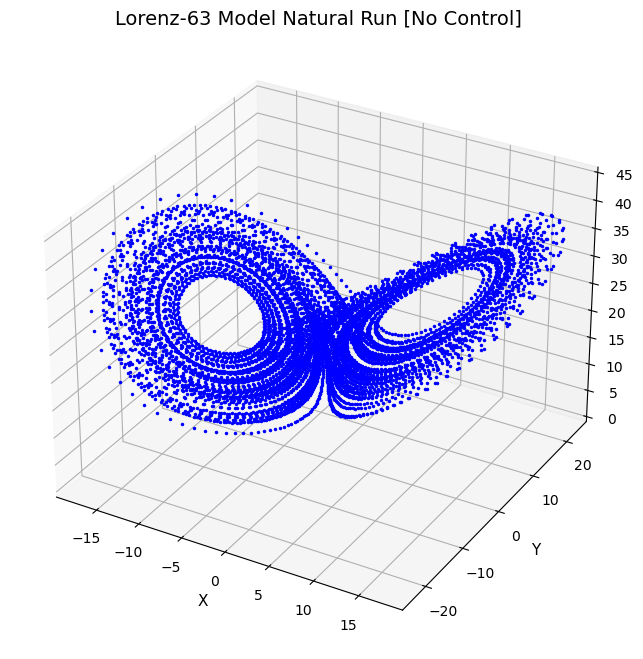

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')  # Enable 3D plotting

# Scatter plot of the Lorenz-63 trajectory
ax.plot(no_control[0:8000, 0], 
        no_control[0:8000, 1], 
        no_control[0:8000, 2], 
        linestyle='None', marker='.', markersize=3, color='blue')

# Labels
ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.set_zlabel('Z', fontsize=11)
ax.set_title('Lorenz-63 Model Natural Run [No Control]', fontsize=14)

# Axis limits
ax.set_xlim(-19, 19)
ax.set_ylim(-25, 25)
ax.set_zlim(0, 45)  # Adjust Z limit based on your data range

# Grid and save
ax.grid(color='grey', linestyle=':', linewidth=0.5)
plt.savefig('Lorenz63_without_control_3d', bbox_inches='tight')
plt.show()


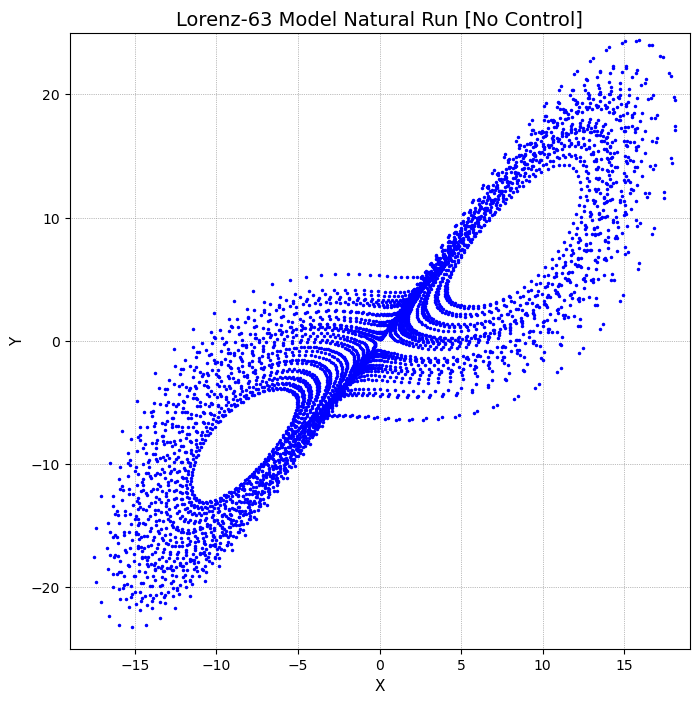

In [142]:
fig = plt.figure(figsize = (8,8))
plt.plot(no_control[0:5000,0], no_control[0:5000,1],linestyle = 'None', marker ='.', markersize =3, color = 'blue')
plt.xlabel('X', fontsize =11)
plt.ylabel('Y', fontsize =11)
plt.xlim(-19,19)
plt.ylim(-25,25)
plt.title('Lorenz-63 Model Natural Run [No Control]',fontsize = 14)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
plt.savefig('Lorenz63_without_control_2d', bbox_inches = 'tight')
plt.show()

#### Reproducing Figure 2 (Miyoshi et al.,. 2022):

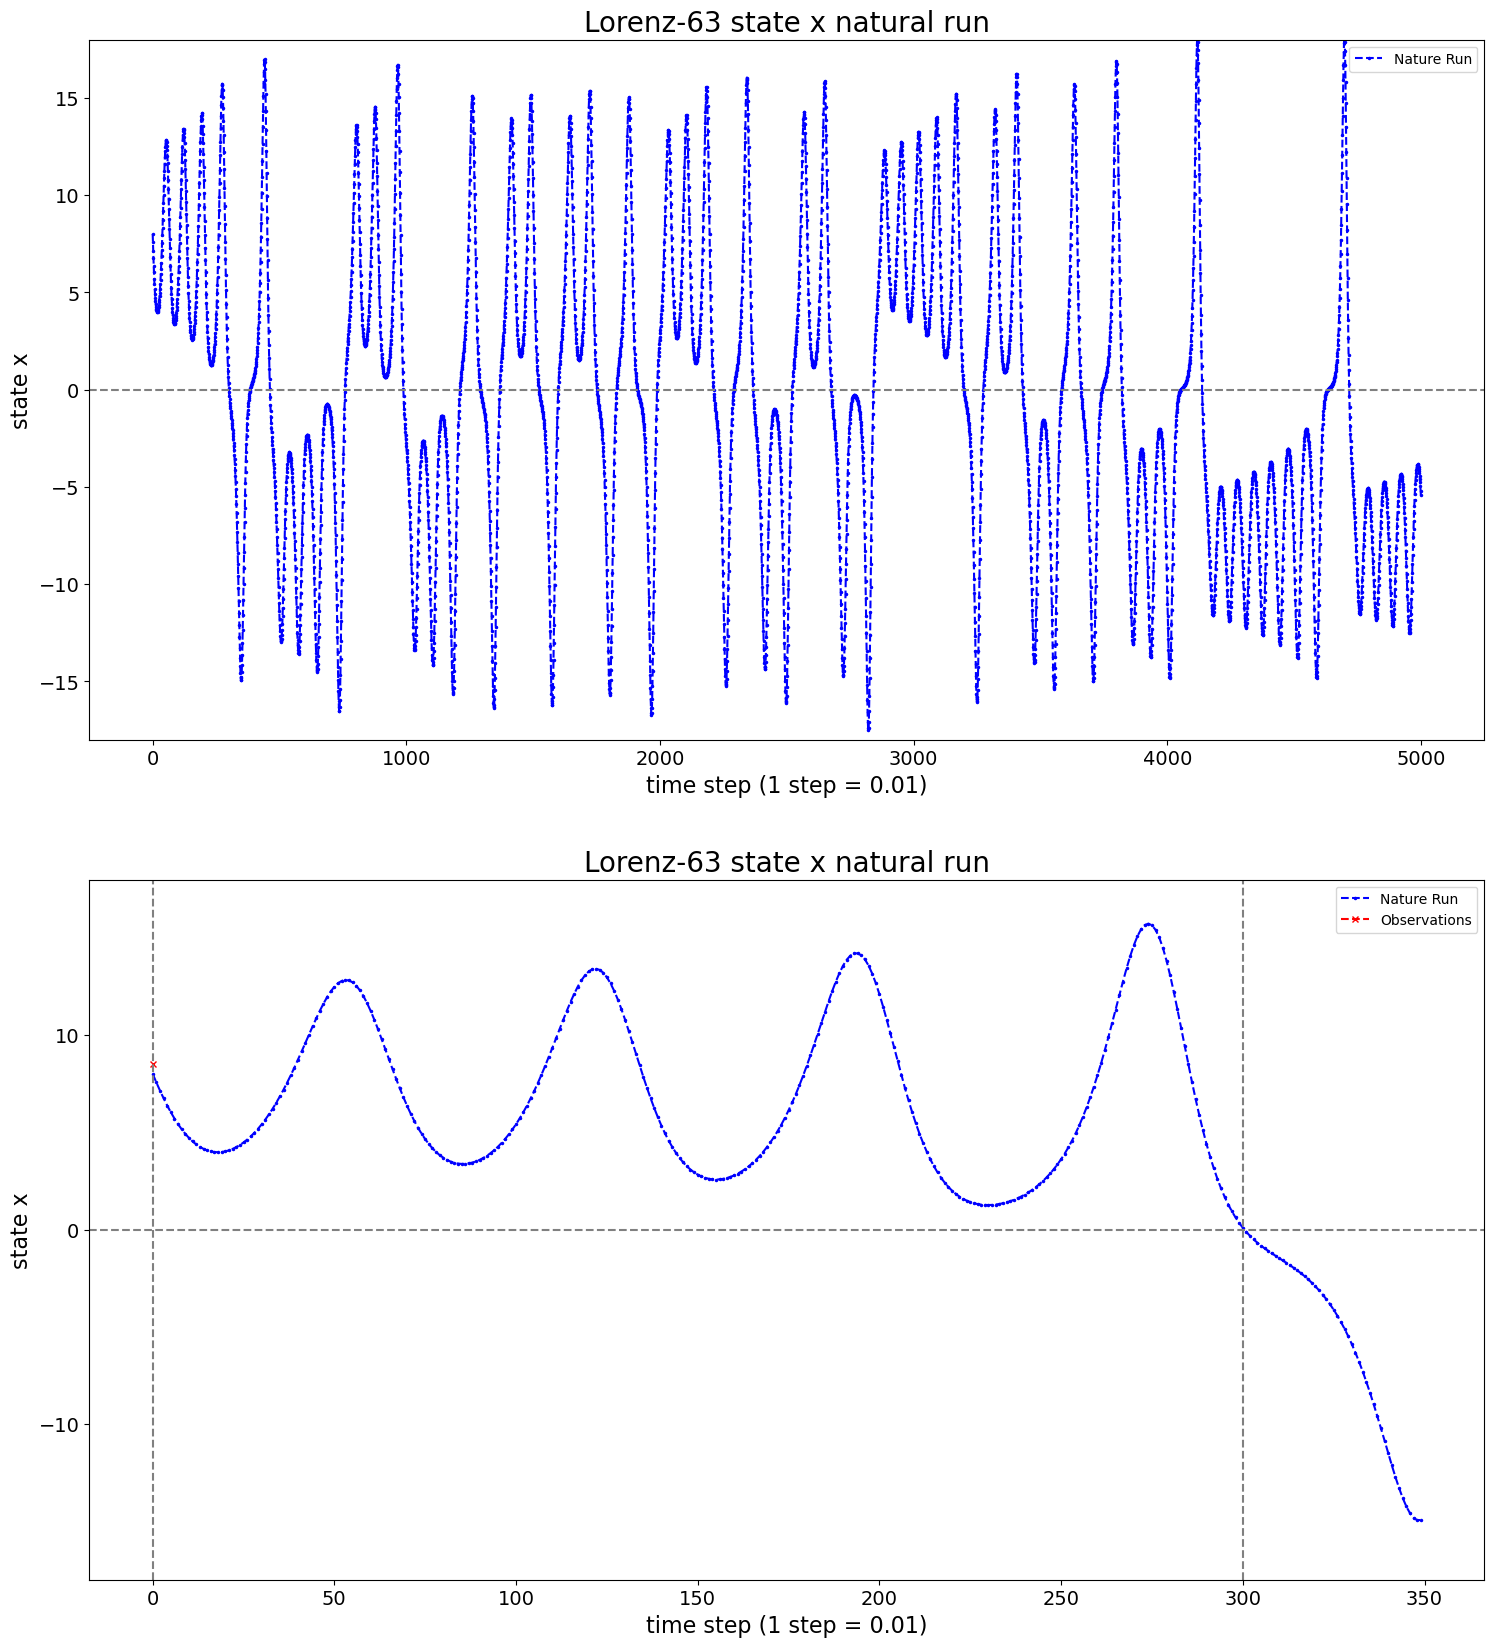

In [143]:
fig = plt.figure(figsize = (18,20))
ax  = fig.add_subplot(211)
plt.plot(no_control[0:5000,0], linestyle = 'dashed',marker='.', markersize = 3, color = 'blue', label = 'Nature Run')
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 state x natural run', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-18,18)
plt.legend(loc='upper right', fontsize=10)
#plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
##
ax  = fig.add_subplot(212)
plt.plot(no_control[0:350,0], linestyle = 'dashed',marker='.', markersize = 3, color = 'blue', label = 'Nature Run')
plt.plot(obs_original[0], linestyle = 'dashed',marker='x', markersize = 5, color = 'red', label = 'Observations')
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.axvline(x=0, linestyle='dashed', color = 'grey')
plt.axvline(x=300, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 state x natural run', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(np.arange(-20, 20, 10),fontsize = 14)
plt.ylim(-18,18)
plt.legend(loc='upper right', fontsize=10)
#plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
plt.show()
fig.savefig('Lorenz63_without_control_2d_Fig2', bbox_inches = 'tight')
plt.close()

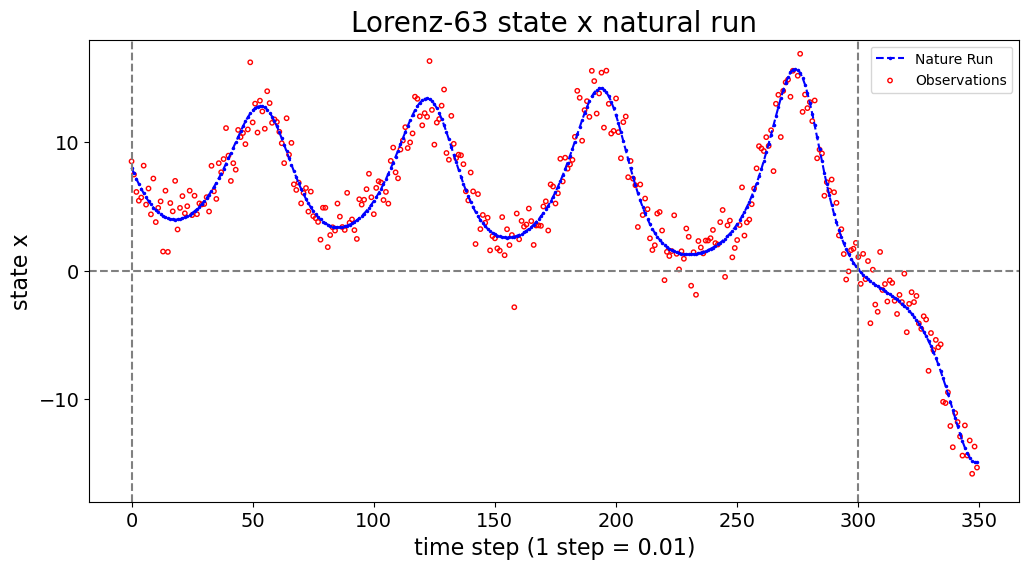

In [39]:
#
# Adding observations to the plot
#
fig = plt.figure(figsize = (12,6))
ax  = fig.add_subplot(111)
plt.plot(no_control[0:350,0], linestyle = 'dashed',marker='.', markersize = 3, color = 'blue', label = 'Nature Run')
plt.scatter(np.arange(350),y_obs[0,105768:105768+350], marker='o', s = 10, facecolors='none', edgecolors='red', label="Observations")
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.axvline(x=0, linestyle='dashed', color = 'grey')
plt.axvline(x=300, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 state x natural run', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(np.arange(-20, 20, 10),fontsize = 14)
plt.ylim(-18,18)
plt.legend(loc='upper right', fontsize=10)
#plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
plt.show()
fig.savefig('Lorenz63_nature_run_observations_without_control_2d_Fig2', bbox_inches = 'tight')
plt.close()


#### Nature Run + Observations:

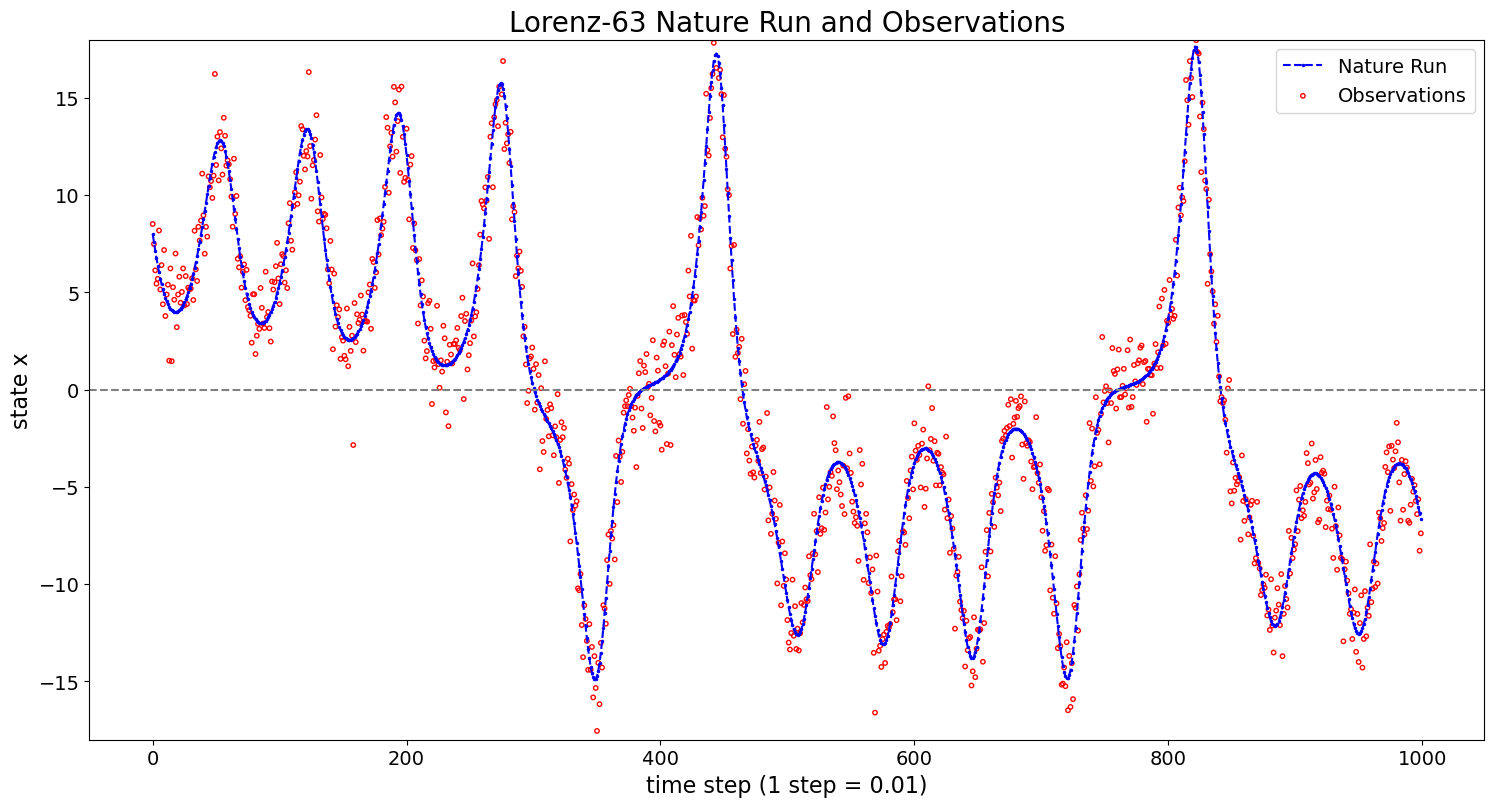

In [144]:
fig = plt.figure(figsize = (18,20))
ax  = fig.add_subplot(211)
plt.plot(x_nature[0,105768:106768], linestyle = 'dashed',marker='.', markersize = 3, color = 'blue', label="Nature Run")
plt.scatter(np.arange(1000),y_obs[0,105768:106768], marker='o', s = 10, facecolors='none', edgecolors='red', label="Observations")
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 Nature Run and Observations', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-18,18)
ax.legend(fontsize=14)
#fig.savefig('Lorenz63_nature_run_observations_without_control_2d_Fig2', bbox_inches = 'tight')


In [ ]:
#--------------------------------------------------------------------
# CREATE HISTORY OF ENSEMBLE FORECAST:
# Run a long ensemble forecast for 8000 time steps.
#--------------------------------------------------------------------
position = 8000

Xf_history = np.zeros((das.edim, position, das.xdim))

# Create the RK4 solver:
solver = run_RK4(lorenz63, sigma, beta, rho, np.ravel(Xf[:,0]), 0.01, 0.01 * position)

# Run forecast for each ensemble member, using the initial condition from the posterior ensemble:
for k in range(das.edim):
    xf_ens = solver.run(np.ravel(Xa[:,k]),np.arange(0,0.01 * position,0.01),np.arange(0,0.01 * position,0.01))
    Xf_history[k,:,:] = xf_ens

In [163]:
position = 8000
print(np.arange(0,0.01 * position,0.01))
len(np.arange(0,0.01 * position,0.01))

[0.000e+00 1.000e-02 2.000e-02 ... 7.997e+01 7.998e+01 7.999e+01]


8000

#### The Control Simulation Experiment (CSE):

In [164]:
"""
The Control Simulation Experiment follows these steps:

1. Perform a DA update using the observations at time t = 0.

2. Run an ensemble forecast for T steps from time t to t+T (T = 4 To).

3. If at least one ensemble member shows the regime shift, activate the control (Step 4); otherwise go to Step 1 for the next DA at time t + Ta. Ta = 8 steps.

4. Add perturbations with Euclidean norm D to the NR at every step from t + 1 to t + Ta - 1. At time t + i (i = 1, ..., Ta - 1), the NR
is evolved from the previous NR state at time t + i - 1 and is perturbed by adding (dx, dy, dz), where D = sqrt(dx^2 + dy^2 + dz^2).

5. At time t + Ta, the new NR is used to simulate the observations; go to Step 1 for the next DA at time t + Ta.
"""

print(' * * * Starting the Control Simulation Experiment * * *')

print(' * * * Step 1: DA update using the observations at time t = 0 * * *')
print('       We choose t = 105768 as the starting time for the control simulation experiment.')

print('evo_history: ', evo_history[:,0])
print('x_nature: ', x_nature[:,105768])
print('no control: ', no_control[0,:])
print('obs: ', y_obs[:,105768])


#-----------------------------------------------------------
# Initializing ensemble:
#-----------------------------------------------------------
das.x0   = x_nature[:,105768]        # initial condition (time = 105768)
xa       = das.x0
Xa       = das.initEns(xa, mu = das.ens_bias_init, sigma = das.ens_sigma_init, edim = das.edim, separate = 'no')

print("xa: ", xa)
print("Xa: ", Xa)

#-----------------------------------------------------------
# Get observations:
#-----------------------------------------------------------
obs.setVal(y_obs[:,105768])
yo = obs.getVal()

print('obs: ', yo)

#--------------------------------------------------------------------
# CREATE HISTORY OF ENSEMBLE FORECAST:
# Run a long ensemble forecast for 8000 time steps.
#--------------------------------------------------------------------
position = 8000
Xf_history = np.zeros((das.edim, position, das.xdim))

# Create the RK4 solver:
solver = run_RK4(lorenz63, sigma, beta, rho, np.ravel(Xf[:,0]), 0.01, 0.01 * position)

# Run forecast for each ensemble member, using the initial condition from the posterior ensemble:
for k in range(das.edim):
    xf_ens = solver.run(np.ravel(Xa[:,k]),np.arange(0,0.01 * position,0.01),np.arange(0,0.01 * position,0.01))
    Xf_history[k,:,:] = xf_ens


#----------------------------------------------
# STEP 1: PERFORM DA UPDATE:
#----------------------------------------------
Xf = Xa
Xa, KH = das.compute_analysis(Xf,yo)

#----------------------------------------------
# STEP 2: RUN ENSEMBLE FORECAST:
#----------------------------------------------   

 * * * Starting the Control Simulation Experiment * * *
 * * * Step 1: DA update using the observations at time t = 0 * * *
       We choose t = 105768 as the starting time for the control simulation experiment.
evo_history:  [ 8.01616968  3.56871156 31.47173769]
x_nature:  [ 8.01616968  3.56871156 31.47173769]
no control:  [ 8.01616968  3.56871156 31.47173769]
obs:  [ 8.52310632  1.5807438  31.95505162]
xa:  [ 8.01616968  3.56871156 31.47173769]
Xa:  [[ 8.65678354  9.16659483  6.22513065]
 [ 6.35741087  1.50141672  2.8473071 ]
 [33.03161673 30.55933171 30.82426463]]
obs:  [ 8.52310632  1.5807438  31.95505162]
Number of steps:  8000
Integration step size:  0.01
Final time:  80.0
len(initial_state):  3
Running Solve IVP
Initial conditions:  [ 8.65678354  6.35741087 33.03161673]
Time interval:  [0.000e+00 1.000e-02 2.000e-02 ... 7.997e+01 7.998e+01 7.999e+01]
Output times:  [0.000e+00 1.000e-02 2.000e-02 ... 7.997e+01 7.998e+01 7.999e+01]
Running Solve IVP
Initial conditions:  [ 9.166594

Xf: 
[[8.65678354 9.16659483 6.22513065]]
Xa: 
[[ 8.7068472   9.17009768  7.17666182]
 [ 3.70270016  1.51019224  2.21276976]
 [31.64573172 30.56446354 30.6340288 ]]
[0 1 2]


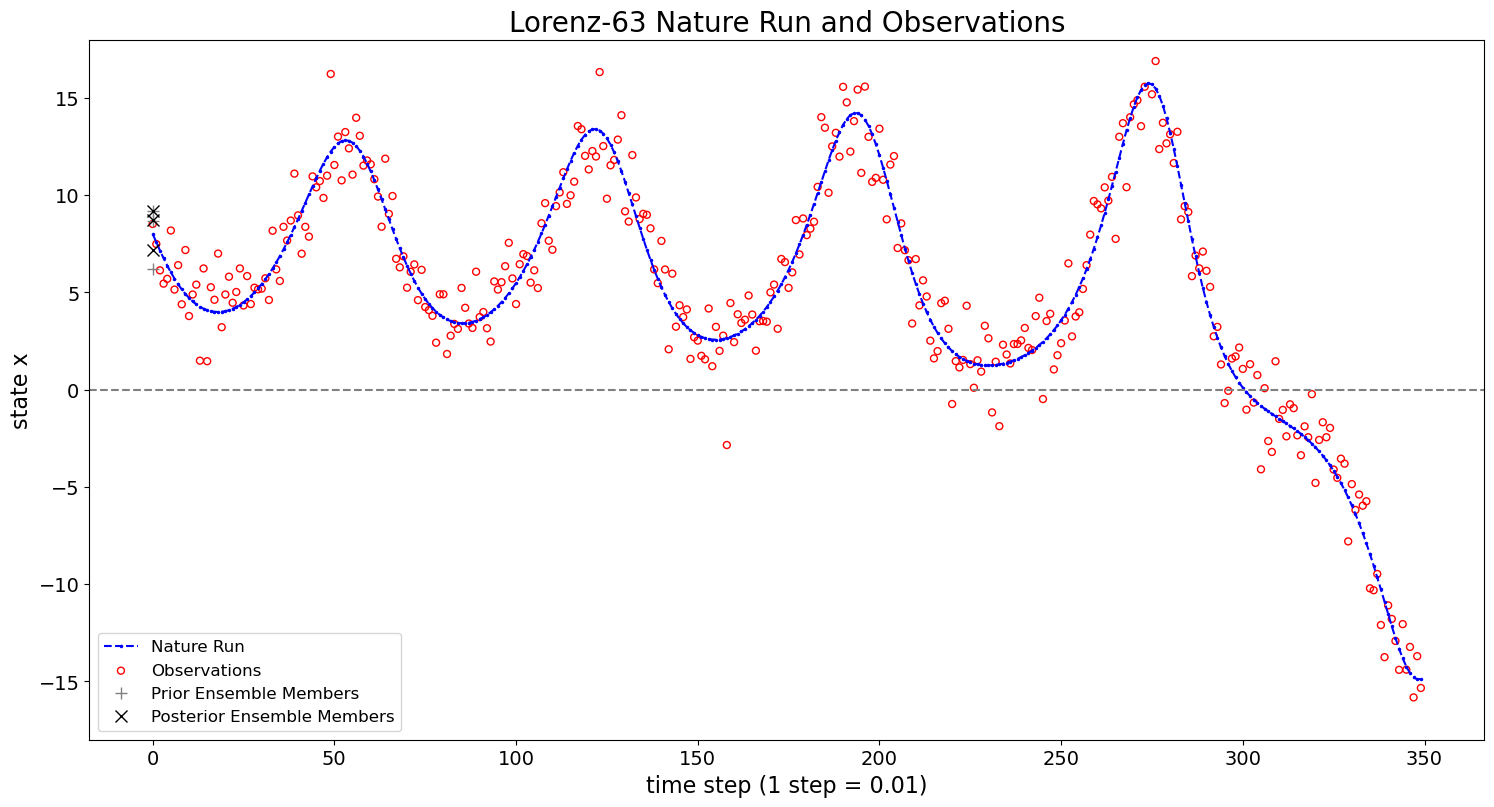

In [167]:
#
# Creating some nice plots:
#
print('Xf: ')
print(Xf[0,:])
print('Xa: ')
print(Xa)
print(np.arange(Xf.shape[1]))


fig = plt.figure(figsize = (18,20))
ax  = fig.add_subplot(211)
plt.plot(x_nature[0,105768:105768+350], linestyle = 'dashed',marker='.', markersize = 3, color = 'blue', label="Nature Run")
plt.scatter(np.arange(350),y_obs[0,105768:105768+350], marker='o', s = 25, facecolors='none', edgecolors='red', label="Observations")
for member in range(np.shape(Xf)[1]):  # Assuming 3 ensemble members
    if member == 0:
        plt.plot(Xf[0, member], linestyle = 'None', marker='+', markersize = 8, color = 'gray', label=f"Prior Ensemble Members")
        plt.plot(Xa[0, member], linestyle = 'None', marker='x', markersize = 8, color = 'black', label=f"Posterior Ensemble Members")
    else:
        plt.plot(Xf[0, member], linestyle = 'None', marker='+', markersize = 8, color = 'gray')
        plt.plot(Xa[0, member], linestyle = 'None', marker='x', markersize = 8, color = 'black')
    #plt.scatter(0, Xf[0, member], marker='x', s=25, color = 'green', label=f"Ensemble member {member+1}")
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 Nature Run and Observations', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-18,18)
ax.legend(fontsize=12)
fig.savefig('Lorenz63_nature_run_observations_without_control_2d_members', bbox_inches = 'tight')


In [147]:
print('evo_history[:,0]: ', evo_history[:,0])
print('shape of evo_history[:,0]: ', np.shape(evo_history[:,0]))

print('Xf[:,0]: ', Xf[:,0].flatten()[0])
print('shape of Xf[:,0]: ', np.shape(np.ravel(Xf[:,0])))
print('shape of Xf: ', np.shape(Xf))
print('type of Xf: ', type(Xf))

evo_history[:,0]:  [ 8.01616968  3.56871156 31.47173769]
shape of evo_history[:,0]:  (3,)
Xf[:,0]:  [[ 8.65678354  6.35741087 33.03161673]]
shape of Xf[:,0]:  (3,)
shape of Xf:  (3, 3)
type of Xf:  <class 'numpy.matrix'>


In [148]:
colors = ['red', 'salmon', 'orange']
for member in range(np.shape(Xf)[1]):  # Assuming 3 ensemble members
    color = colors[member]
    print(color)

red
salmon
orange


Number of steps:  301
Integration step size:  0.01
Final time:  3.0100000000000002
len(initial_state):  3
Running Solve IVP
Initial conditions:  [ 8.7068472   3.70270016 31.64573172]
Time interval:  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57

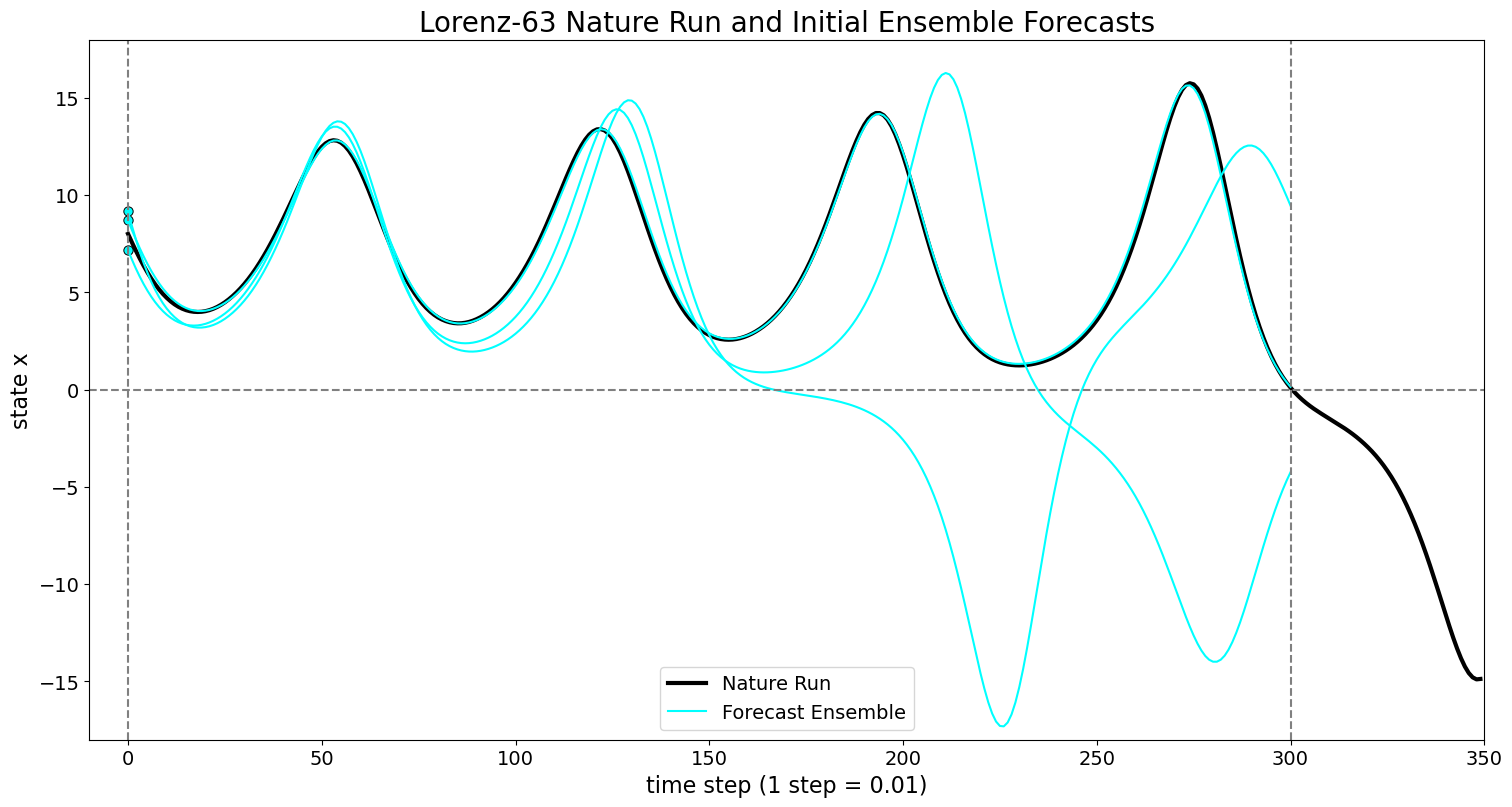

In [151]:
#--------------------------------------------------------------------
# STEP 2: RUN ENSEMBLE FORECAST:
# Run an ensemble forecast for T steps from time t to t+T (T = 4 To).
#--------------------------------------------------------------------
multiple_number = 4 #this is the  parameter before To in the paper 
T_0 = 75.1
position = int(np.ceil(T_0*multiple_number)) #multiple of To

xf_4d = np.zeros((das.edim, position, das.xdim))

# Create the RK4 solver:
solver = run_RK4(lorenz63, sigma, beta, rho, np.ravel(Xf[:,0]), 0.01, 0.01 * position)

# Run forecast for each ensemble member, using the initial condition from the posterior ensemble:
for k in range(das.edim):
    xf_ens = solver.run(np.ravel(Xa[:,k]),np.arange(0,0.01 * position,0.01),np.arange(0,0.01 * position,0.01))
    xf_4d[k,:,:] = xf_ens


#-----------------------------------------------------------
# Plot the results:
#-----------------------------------------------------------
fig = plt.figure(figsize = (18,20))
ax  = fig.add_subplot(211)
#colors = cm.get_cmap('autumn', Xf.shape[1])  # Or try 'Greens', 'plasma', etc.
colors = ['red', 'salmon', 'orange']
plt.plot(x_nature[0,105768:105768+350], linestyle = 'solid', linewidth=3, marker='', markersize = 3, color = 'black', label="Nature Run")
for member in range(np.shape(Xf)[1]):  # Assuming 3 ensemble members
    color = colors[member]
    plt.scatter(0, Xa[0, member], marker='o', s=45, color = 'cyan', edgecolors='black', linewidths=0.7)
    #plt.scatter(0, Xa[0, member], marker='o', s=45, color = color, edgecolors='black', linewidths=0.7)
    if member == 0:
        plt.plot(xf_4d[member,:,0], linestyle = '-', marker='', markersize = 2, color = 'cyan', label = f"Forecast Ensemble")
    else:
        plt.plot(xf_4d[member,:,0], linestyle = '-', marker='', markersize = 2, color = 'cyan')
    #plt.plot(xf_4d[member,:,0], linestyle = 'dashed', marker='', markersize = 2, color = color, label = f"Ensemble member {member+1}")
    
plt.axhline(y = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = 300, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 Nature Run and Initial Ensemble Forecasts', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-18,18)
plt.xlim(-10,350)
ax.legend(fontsize=14)
#fig.savefig('Lorenz63_nature_run_observations_without_control_2d_members_Step2', bbox_inches = 'tight')


In [123]:
#------------------------------------------------------------------------------------------------------------------------------------
# STEP 3: CONTROL STEP:
# Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.
#------------------------------------------------------------------------------------------------------------------------------------
print(' * * * Step 3: Control step * * *')
print('Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.')
tt = 0
Ta = 8

y_obs_full = y_obs[:,105768:105768+350]  # Observations for the first 350 time steps

#-----------------------------------------------------------

# Regime shift check
def detect_regime_shift(xf_4d):
    """Return True if any ensemble member has any negative value at forecast time 0."""
    return np.any(xf_4d[:, :, 0] < 0)


# Checking for regime shift:
print(f'\n Step 3 — CONTROL at time t={tt}')
shift_members = detect_regime_shift(xf_4d)
print(f'  There are some ensemble members showing regime shift')

if shift_members == False:
    print(f'  Regime shift detected: At least one ensemble member shows the regime shift')
    print(f'  Control activated')
    # Add perturbations to the NR
    #perturbation = np.random.normal(0, 1, size=(das.xdim, das.edim))
    print(f'  Perturbation added: {perturbation}')
    ##perturbation = perturbation / np.linalg.norm(perturbation) * das.D
    # Apply perturbations to the NR
    #for k in range(das.edim):
    #    x_nature[:, tt + 1] = x_nature[:, tt] + perturbation[:, k]
    #    print(f'  New NR state: {x_nature[:, tt + 1]}')
else:
    print(f'  No regime shift detected: Go to Step 1 for the next DA at time t + Ta')
    print(f'  No Control Applied')
    # Proceed with the next DA step
    t_updated = tt + Ta
    tt = t_updated
    print('  xf_4d: ', np.shape(xf_4d))
    print('  tt: ', tt)
    print('  xf_4d: ', xf_4d[:,tt,:])
    #-----------------------------------------------------------
    # Get observations at t + Ta:
    #-----------------------------------------------------------
    yo = y_obs_full[:,tt]
    print('  obs: ', yo)
    #----------------------------------------------
    # STEP 1: PERFORM DA UPDATE:
    #----------------------------------------------
    Xf = xf_4d[:,tt,:]
    Xa, KH = das.compute_analysis(Xf,yo)
    #x_nature[:, tt + 1] = x_nature[:, tt]
    #print(f'  NR state remains unchanged: {x_nature[:, tt + 1]}')
    # Continue with the next DA step
    # (e.g., update observations, run the next forecast, etc.)
    




 * * * Step 3: Control step * * *
Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.

 Step 3 — CONTROL at time t=0
  There are some ensemble members showing regime shift
  No regime shift detected: Go to Step 1 for the next DA at time t + Ta
  No Control Applied
  xf_4d:  (3, 301, 3)
  tt:  8
  xf_4d:  [[ 5.47590541  2.61081801 27.01749697]
 [ 4.7690824   1.33469483 25.25794567]
 [ 4.25800658  1.95165886 25.49714399]]
  obs:  [ 4.3939681   2.16849319 26.37251332]
Running ETKF
shape of Xb:  (3, 3)
Xb:  [[-6.22550139 -9.09058878 15.31609017]
 [-5.68482523 -9.11921281 14.80403804]
 [-6.3109299  -8.61727761 14.92820752]]
x_mean:  [[11.70140679]
 [10.45390763]
 [10.56893648]]
Xb_pert:  [[-6.22550139 -9.09058878 15.31609017]
 [-5.68482523 -9.11921281 14.80403804]
 [-6.3109299  -8.61727761 14.92820752]]
Xb_pert check:  [[-6.22550139 -9.09058878 15.31609017]
 [-5.68482523 -9.11921281 14.80403804]
 [-6.3109299  -8.6

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------
# STEP 3: CONTROL STEP:
# Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.
#------------------------------------------------------------------------------------------------------------------------------------
print(' * * * Step 3: Control step * * *')
print('Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.')
tt = 0
Ta = 8
D  = 0.05
acyc_step = 8
y_obs_full = y_obs[:,105768:105768+350]      # Observations for the first 350 time steps
x_original = x_nature[:,105768]   # Original state of the NR

#-----------------------------------------------------------


# Regime shift check
def detect_regime_shift(forecast):
    """Return True if any ensemble member has any negative value at forecast time 0."""
    return np.any(forecast < 0)


# Forecast all current ensemble members
predicted_changes = []
safe_members = []

for k in range(das.edim):
    xf = xf_4d[k, :, 0]
    if detect_regime_shift(xf):
        predicted_changes.append(k)
    else:
        safe_members.append(k)

print(f'  Ensemble members showing regime shift: {predicted_changes}')
print(f'  Ensemble members showing no regime shift: {safe_members}')



#
# Step 3a: standard case - build perturbations from current ensemble members
#
if 0 < len(predicted_changes) < das.edim:
    print(f'  Regime shift detected: At least one ensemble member shows the regime shift')
    print(f'  Control activated')
    apply_control = True
    xf_shift         = xf_4d[np.random.choice(predicted_changes), :, :]
    xf_no_shift      = xf_4d[np.random.choice(safe_members), :, :]
    perturbation_all = xf_no_shift - xf_shift
    perturbation_vec = perturbation_all / (np.linalg.norm(perturbation_all) * D) 
    #print(np.shape(perturbation_vec))
    #print(f'  Perturbation computed: {perturbation_vec[0:3,:]}')
    nature_fcst_gen  = solver.run(x_original,np.arange(0,0.015,0.01),np.arange(0,0.015,0.01))
    nature_fcst = nature_fcst_gen[1,:]
    #print('nature trajectory: ', nature_fcst, np.shape(nature_fcst))
    for q in range(acyc_step - 1):
        print(f'  Adding perturbation to NR at time step {tt + q + 1}')
        # Apply perturbations to the NR
        x_perturbed_ini      = nature_fcst + perturbation_vec[q, :]
        perturbed_nature_evo = solver.run(x_perturbed_ini,np.arange(0,0.015,0.01),np.arange(0,0.015,0.01))
        print(f'  New NR state: {x_perturbed_ini}')
        print(f'  Perturbed NR trajectory: {perturbed_nature_evo[1,:]}')
        nature_fcst = perturbed_nature_evo[1,:]
    print('\n')
    # Create observations from new nature run:
#        
# Step 3b: all ensemble members show regime shift
#
elif len(predicted_changes) == das.edim:
    print(f'  All ensemble members show regime shift!!')
    print(f' In this case, we use the ensemble members from previous time steps and identify the members that do not show regime shift')
    max_lookback = 5    # maximum number of previous time steps to look back
    exit
    # 
    for lookback in range(1, max_lookback + 1):
        print(f'  Looking back {lookback} time steps')
        # Check if any ensemble member from the previous time step shows no regime shift
        for k in range(das.edim):
            xf_ens = solver.run(np.ravel(Xf_history[k,tt-lookback,0]),np.arange(tt-lookback,0.01 * position + (tt-lookback),0.01),np.arange(tt-lookback,0.01 * position + (tt-lookback),0.01))
            if detect_regime_shift(xf_ens):
                print(f'  Ensemble member {k} shows regime shift at time step {tt-lookback}')
                xf_aux = xf_ens
                detected_regime_shift = True
        if detected_regime_shift:
            print(f'  Regime shift detected: At least one historic ensemble member shows the regime shift')
            #
            # I have to add code to take into account that the time step of the Xf_history is not the same as the time step of the xf_4d !!!!
            #




 * * * Step 3: Control step * * *
Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.
  Ensemble members showing regime shift: [1, 2]
  Ensemble members showing no regime shift: [0]
  Regime shift detected: At least one ensemble member shows the regime shift
  Control activated
Running Solve IVP
Initial conditions:  [ 8.01616968  3.56871156 31.47173769]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
  Adding perturbation to NR at time step 1
Running Solve IVP
Initial conditions:  [ 7.54467034  3.44681993 30.98642318]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
  New NR state: [ 7.54467034  3.44681993 30.98642318]
  Perturbed NR trajectory: [ 7.1430594   3.21508185 30.41205558]
  Adding perturbation to NR at time step 2
Running Solve IVP
Initial conditions:  [ 7.12718048  3.36820353 30.5023061 ]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
  New NR state: [ 7.12718048  3.36820353 3

In [ ]:
np.random.choice(safe_members)
print(np.arange(0, 0.015, 0.01))
print(np.shape(x_original))
np.arange(7,0.01 * position,0.01)
print(position)
print(np.shape(np.arange(7,0.01 * position + 7,0.01)))
print(xf_ens, np.shape(xf_ens))
print(Xf_history[:,10,0])

[0.   0.01]
(3, 350)


#### Clean Code:

In [393]:
#------------------------------------------------------------------------------------------------------------------------------------
# STEP 3-4: CONTROL STEP:
# Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.
#------------------------------------------------------------------------------------------------------------------------------------

#
# Defining the function to detect regime shifts:
#
def detect_regime_shift(forecast):
    return np.any(forecast < 0)

#
# Defining the function to classify ensemble members:
#
def classify_ensemble(xf_4d):
    predicted_changes = []
    safe_members = []
    for k in range(xf_4d.shape[0]):
        if detect_regime_shift(xf_4d[k, :, 0]):
            predicted_changes.append(k)
        else:
            safe_members.append(k)
    return predicted_changes, safe_members

#
# Defining the function to compute perturbation vector:
#
def compute_perturbation(xf_safe, xf_shift, D):
    delta = xf_safe - xf_shift
    return delta / (np.linalg.norm(delta) * D)

#
# Defining the function to evolve nature with control:
#
def evolve_nature_with_control(x_init, perturb_vec, solver, steps):
    x = x_init.copy()
    history = []
    for q in range(steps):
        x_perturbed = x + perturb_vec[q, :]
        x_next = solver.run(x_perturbed, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))[1, :]
        history.append(x_perturbed)
        x = x_next
    return x, history



print('*** Step 3: Control step ***')
print('Checking for regime shift among ensemble members...')

# Classify ensemble members
predicted_changes, safe_members = classify_ensemble(xf_4d)

print(f'  Shift predicted by: {predicted_changes}')
print(f'  Safe ensemble members: {safe_members}')

# Apply control only if some predict shift and others don't
if 0 < len(predicted_changes) < xf_4d.shape[0]:
    print(f'  Regime shift detected. Activating control.')

    # Select members
    shift_idx = np.random.choice(predicted_changes)
    safe_idx  = np.random.choice(safe_members)
    xf_shift  = xf_4d[shift_idx, :, :]
    xf_safe   = xf_4d[safe_idx, :, :]

    # Compute perturbation vector
    perturb_vec = compute_perturbation(xf_safe, xf_shift, D)

    # Evolve NR forward with control
    x_next = solver.run(x_original, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))[1, :]
    x_final, history = evolve_nature_with_control(x_next, perturb_vec, solver, acyc_step - 1)

    # Optionally log or store `history`
    print('  Control applied successfully.')

else:
    print('  No control applied. Proceeding with next DA step.')




*** Step 3: Control step ***
Checking for regime shift among ensemble members...
  Shift predicted by: [1, 2]
  Safe ensemble members: [0]
  Regime shift detected. Activating control.
Running Solve IVP
Initial conditions:  [ 8.01616968  3.56871156 31.47173769]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 7.69634368  3.39999352 30.98461025]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 7.39244218  3.26869892 30.49862078]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 7.10539828  3.1714242  30.01586594]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 6.83589414  3.10511209 29.53808225]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 6.58441444  3.06702977 29.06672596]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initia

In [396]:
#------------------------------------------------------------------------------------------------------------------------------------
# STEP 5: The new NR is used to simulate the observations; go to Step 1 for the next DA at time t + Ta.:
#------------------------------------------------------------------------------------------------------------------------------------
new_nr = x_final.copy()
print('new_nr: ', new_nr)
yo_new = new_nr + np.random.normal(0, np.sqrt(2), das.xdim)
print('yo_new: ', yo_new)

#
# Assimilation step:
#
Xf = Xa.copy()
print('Xf: ', Xf)
print('shape of Xf: ', np.shape(Xf))
Xa, KH = das.compute_analysis(Xf,yo_new)
print('Xa: ', Xa)

new_nr:  [ 5.84321951  3.04325759 27.58769735]
yo_new:  [ 7.43460537  3.70705146 27.56540785]
Xf:  [[ 7.11554893  7.50140915  5.89824426]
 [ 2.73995986  1.10080041  1.64215439]
 [30.90156663 30.09912309 30.14264289]]
shape of Xf:  (3, 3)
Running ETKF
shape of Xb:  (3, 3)
Xb:  [[ 0.27714815  0.66300837 -0.94015652]
 [ 0.91232164 -0.72683781 -0.18548383]
 [ 0.52045576 -0.28198778 -0.23846798]]
x_mean:  [[ 6.83840078]
 [ 1.82763822]
 [30.38111087]]
Xb_pert:  [[ 0.27714815  0.66300837 -0.94015652]
 [ 0.91232164 -0.72683781 -0.18548383]
 [ 0.52045576 -0.28198778 -0.23846798]]
Xb_pert check:  [[ 0.27714815  0.66300837 -0.94015652]
 [ 0.91232164 -0.72683781 -0.18548383]
 [ 0.52045576 -0.28198778 -0.23846798]]
shape x_mean:  (3, 1)
shape of y_mean:  (3, 1)
shape of yo:  (3, 1)
Hlin:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
R:  [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
Es simétrica: True
Eigenvalores de R: [2. 2. 2.]
YbT:  [[ 0.27714815  0.91232164  0.52045576]
 [ 0.66300837 -0.72683781 -0.28198778]
 [

In [ ]:
"""
The Control Simulation Experiment follows these steps:

1. Perform a DA update using the observations at time t = 0.

2. Run an ensemble forecast for T steps from time t to t+T (T = 4 To).

3. If at least one ensemble member shows the regime shift, activate the control (Step 4); otherwise go to Step 1 for the next DA at time t + Ta. Ta = 8 steps.

4. Add perturbations with Euclidean norm D to the NR at every step from t + 1 to t + Ta - 1. At time t + i (i = 1, ..., Ta - 1), the NR
is evolved from the previous NR state at time t + i - 1 and is perturbed by adding (dx, dy, dz), where D = sqrt(dx^2 + dy^2 + dz^2).

5. At time t + Ta, the new NR is used to simulate the observations; go to Step 1 for the next DA at time t + Ta.
"""

print(' * * * Starting the Control Simulation Experiment * * *')

print(' * * * Step 1: DA update using the observations at time t = 0 * * *')
print('       We choose t = 105768 as the starting time for the control simulation experiment.')

print('evo_history: ', evo_history[:,0])
print('x_nature: ', x_nature[:,105768])
print('no control: ', no_control[0,:])
print('obs: ', y_obs[:,105768])

#------------------------------------------------------------
# Defining some useful functions:
#------------------------------------------------------------
# Defining the function to detect regime shifts:
def detect_regime_shift(forecast):
    return np.any(forecast < 0)

# Defining the function to classify ensemble members:
def classify_ensemble(xf_4d):
    predicted_changes = []
    safe_members = []
    for k in range(xf_4d.shape[0]):
        if detect_regime_shift(xf_4d[k, :, 0]):
            predicted_changes.append(k)
        else:
            safe_members.append(k)
    return predicted_changes, safe_members

# Defining the function to compute perturbation vector:
def compute_perturbation(xf_safe, xf_shift, D):
    delta = xf_safe - xf_shift
    return delta / (np.linalg.norm(delta) * D)

# Defining the function to evolve nature with control:
def evolve_nature_with_control(x_init, perturb_vec, solver, steps):
    x = x_init.copy()
    history = []
    for q in range(steps):
        x_perturbed = x + perturb_vec[q, :]
        x_next = solver.run(x_perturbed, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))[1, :]
        history.append(x_perturbed)
        x = x_next
    return x, history


#-----------------------------------------------------------
# Initializing ensemble:
#-----------------------------------------------------------
das.x0   = x_nature[:,105768]        # initial condition (time = 105768)
xa       = das.x0
Xa       = das.initEns(xa, mu = das.ens_bias_init, sigma = das.ens_sigma_init, edim = das.edim, separate = 'no')

print("xa: ", xa)
print("Xa: ", Xa)

#-----------------------------------------------------------
# Get observations:
#-----------------------------------------------------------
obs.setVal(y_obs[:,105768])
yo = obs.getVal()

print('obs: ', yo)

#--------------------------------------------------------------------
# CREATE HISTORY OF ENSEMBLE FORECAST:
# Run a long ensemble forecast for 8000 time steps.
#--------------------------------------------------------------------
position = 8000
Xf_history = np.zeros((das.edim, position, das.xdim))

# Create the RK4 solver:
solver = run_RK4(lorenz63, sigma, beta, rho, np.ravel(Xf[:,0]), 0.01, 0.01 * position)

# Run forecast for each ensemble member, using the initial condition from the posterior ensemble:
for k in range(das.edim):
    xf_ens = solver.run(np.ravel(Xa[:,k]),np.arange(0,0.01 * position,0.01),np.arange(0,0.01 * position,0.01))
    Xf_history[k,:,:] = xf_ens






#----------------------------------------------
# STEP 1: PERFORM DA UPDATE:
#----------------------------------------------
Xf = Xa
Xa, KH = das.compute_analysis(Xf,yo)

#--------------------------------------------------------------------
# STEP 2: RUN ENSEMBLE FORECAST:
# Run an ensemble forecast for T steps from time t to t+T (T = 4 To).
#--------------------------------------------------------------------
multiple_number = 4 #this is the  parameter before To in the paper 
T_0 = 75.1
position = int(np.ceil(T_0*multiple_number)) #multiple of To

xf_4d = np.zeros((das.edim, position, das.xdim))

# Create the RK4 solver:
solver = run_RK4(lorenz63, sigma, beta, rho, np.ravel(Xf[:,0]), 0.01, 0.01 * position)

# Run forecast for each ensemble member, using the initial condition from the posterior ensemble:
for k in range(das.edim):
    xf_ens = solver.run(np.ravel(Xa[:,k]),np.arange(0,0.01 * position,0.01),np.arange(0,0.01 * position,0.01))
    xf_4d[k,:,:] = xf_ens


#------------------------------------------------------------------------------------------------------------------------------------
# STEP 3-4: CONTROL STEP:
# Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.
#------------------------------------------------------------------------------------------------------------------------------------
# Classify ensemble members
predicted_changes, safe_members = classify_ensemble(xf_4d)
print(f'  Shift predicted by: {predicted_changes}')
print(f'  Safe ensemble members: {safe_members}')

# Apply control only if some predict shift and others don't
if 0 < len(predicted_changes) < xf_4d.shape[0]:
    print(f'  Regime shift detected. Activating control.')
    # Select members
    shift_idx = np.random.choice(predicted_changes)
    safe_idx  = np.random.choice(safe_members)
    xf_shift  = xf_4d[shift_idx, :, :]
    xf_safe   = xf_4d[safe_idx, :, :]
    #
    # Compute perturbation vector
    perturb_vec = compute_perturbation(xf_safe, xf_shift, D)
    #
    # Evolve NR forward with control
    x_next = solver.run(x_original, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))[1, :]
    x_final, history = evolve_nature_with_control(x_next, perturb_vec, solver, acyc_step - 1)
    #
    # Optionally log or store `history`
    print('  Control applied successfully.')
else:
    print('  No control applied. Proceeding with next DA step.')


#------------------------------------------------------------------------------------------------------------------------------------
# STEP 5: The new NR is used to simulate the observations; go to Step 1 for the next DA at time t + Ta.:
#------------------------------------------------------------------------------------------------------------------------------------
new_nr = x_final.copy()
yo_new = new_nr + np.random.normal(0, np.sqrt(2), das.xdim)

#
# Assimilation step:
#
Xf = Xa.copy()
print('Xf: ', Xf)
print('shape of Xf: ', np.shape(Xf))
Xa, KH = das.compute_analysis(Xf,yo_new)
print('Xa: ', Xa)


## Creating some plots to better understand Step 4 from Control Simulation Experiment (CSE):

*** Step 3: Control step ***
Checking for regime shift among ensemble members...
  Shift predicted by: [1, 2]
  Safe ensemble members: [0]
  Regime shift detected. Activating control.
Running Solve IVP
Initial conditions:  [ 8.01616968  3.56871156 31.47173769]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 7.69634368  3.39999352 30.98461025]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 7.39244218  3.26869892 30.49862078]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 7.10539828  3.1714242  30.01586594]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 6.83589414  3.10511209 29.53808225]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initial conditions:  [ 6.58441444  3.06702977 29.06672596]
Time interval:  [0.   0.01]
Output times:  [0.   0.01]
Running Solve IVP
Initia

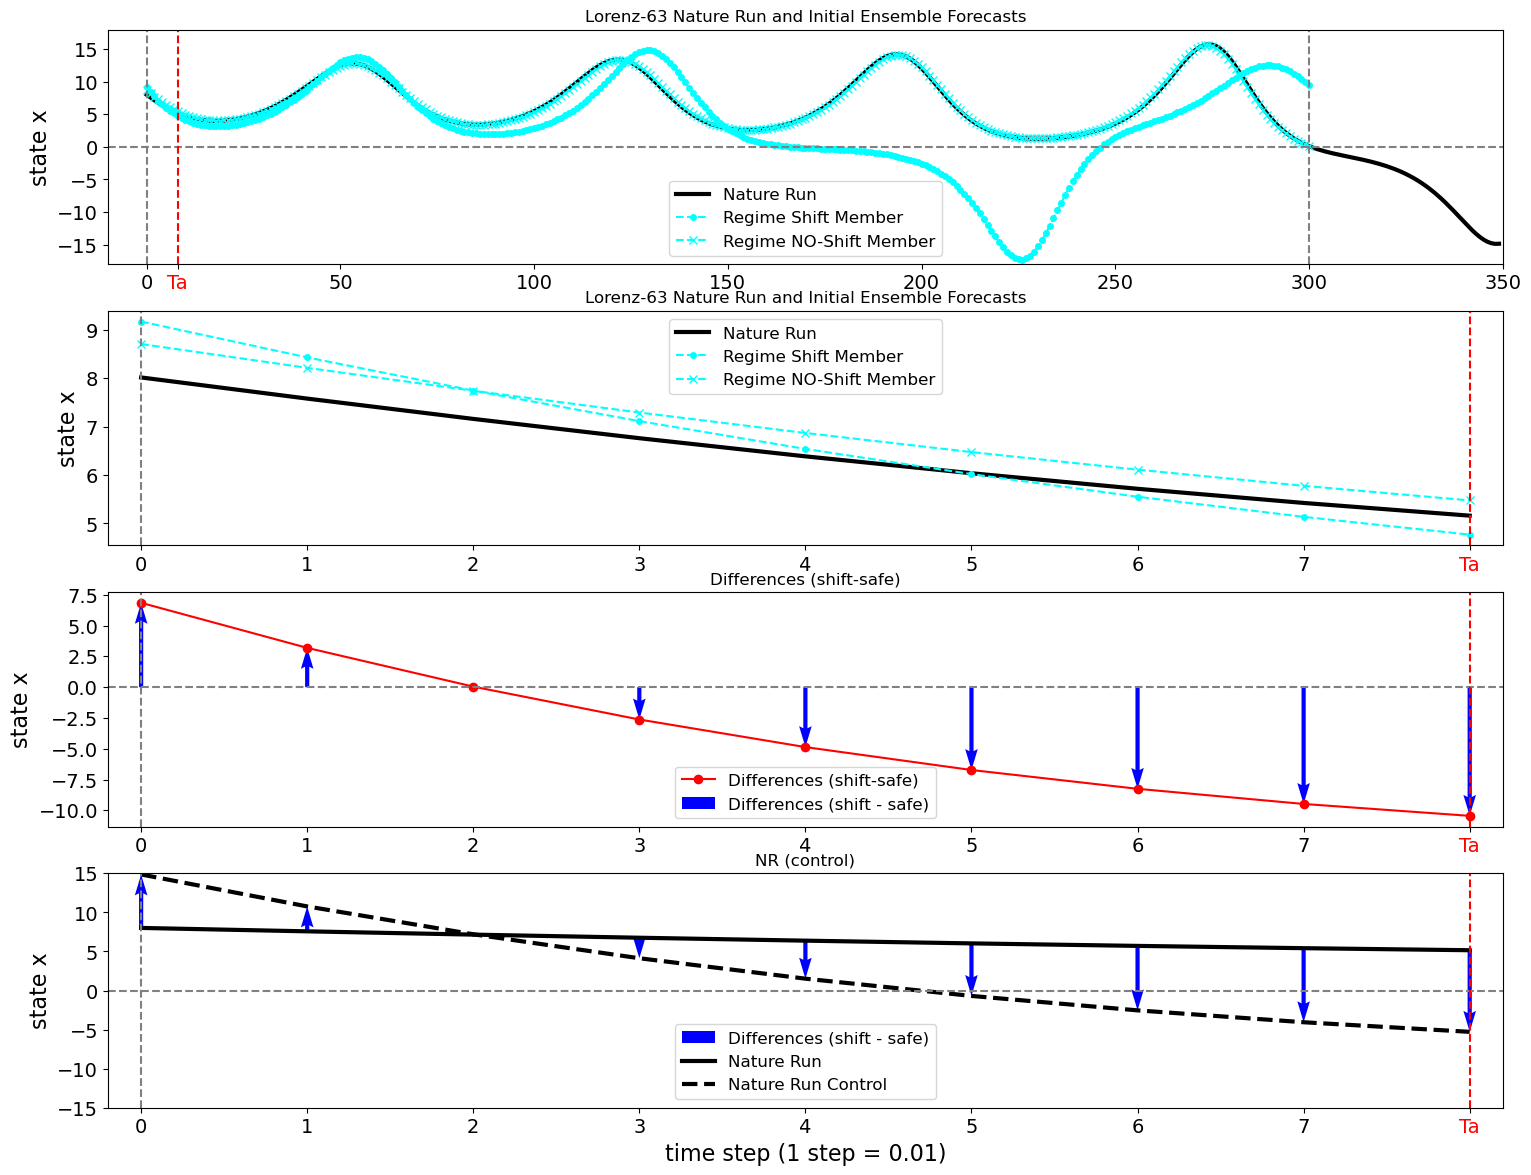

In [392]:
#------------------------------------------------------------------------------------------------------------------------------------
# STEP 3-4: CONTROL STEP:
# Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.
#------------------------------------------------------------------------------------------------------------------------------------

#
# Defining the function to detect regime shifts:
#
def detect_regime_shift(forecast):
    return np.any(forecast < 0)

#
# Defining the function to classify ensemble members:
#
def classify_ensemble(xf_4d):
    predicted_changes = []
    safe_members = []
    for k in range(xf_4d.shape[0]):
        if detect_regime_shift(xf_4d[k, :, 0]):
            predicted_changes.append(k)
        else:
            safe_members.append(k)
    return predicted_changes, safe_members

#
# Defining the function to compute perturbation vector:
#
def compute_perturbation(xf_safe, xf_shift, D):
    delta = xf_safe - xf_shift
    return delta / (np.linalg.norm(delta) * D)

#
# Defining the function to evolve nature with control:
#
def evolve_nature_with_control(x_init, perturb_vec, solver, steps):
    x = x_init.copy()
    history = []
    for q in range(steps):
        x_perturbed = x + perturb_vec[q, :]
        x_next = solver.run(x_perturbed, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))[1, :]
        history.append(x_perturbed)
        x = x_next
    return x, history



print('*** Step 3: Control step ***')
print('Checking for regime shift among ensemble members...')

# Classify ensemble members
predicted_changes, safe_members = classify_ensemble(xf_4d)

print(f'  Shift predicted by: {predicted_changes}')
print(f'  Safe ensemble members: {safe_members}')


#-----------------------------------------------------------------------------
# Plotting perturbations computed taking differences between ensemble members:
#-----------------------------------------------------------------------------
np.random.seed(2)  #  Set seed for reproducibility
shift_idx = np.random.choice(predicted_changes)
safe_idx  = np.random.choice(safe_members)
xf_shift  = xf_4d[shift_idx, :, :]
xf_safe   = xf_4d[safe_idx, :, :]
    
fig = plt.figure(figsize = (18,14))
ax  = fig.add_subplot(411)
plt.plot(x_nature[0,105768:105768+350], linestyle = 'solid', linewidth = 3, marker = '', markersize = 3, color = 'black', label="Nature Run")
plt.plot(xf_shift[:,0], linestyle = '--',  linewidth = 1.5, marker='o', markersize = 4, color = 'cyan', label = f"Regime Shift Member")
plt.plot(xf_safe[:,0], linestyle = '--',  linewidth = 1.5, marker='x', markersize = 6, color = 'cyan', label = f"Regime NO-Shift Member")
plt.axhline(y = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = Ta, linestyle='dashed', color = 'red')
plt.axvline(x = 300, linestyle='dashed', color = 'grey')
#plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 Nature Run and Initial Ensemble Forecasts', fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
xticks = list(plt.xticks()[0]) + [Ta]
xticks = sorted(set(xticks))
ax.set_xticks(xticks)
labels = [r"Ta" if int(tick) == Ta else str(int(tick)) for tick in xticks]
ax.set_xticklabels(labels, fontsize=14)
ax.get_xticklabels()[labels.index("Ta")].set_color('red')
plt.ylim(-18,18)
plt.xlim(-10,350)
ax.legend(fontsize = 12)
#
ax  = fig.add_subplot(412)
plt.plot(np.arange(0,9,1),x_nature[0,105768:105768+9], linestyle = 'solid', linewidth = 3, marker = '', markersize = 3, color = 'black', label="Nature Run")
plt.plot(xf_shift[0:9,0], linestyle = '--',  linewidth = 1.5, marker='o', markersize = 4, color = 'cyan', label = f"Regime Shift Member")
plt.plot(xf_safe[0:9,0], linestyle = '--',  linewidth = 1.5, marker='x', markersize = 6, color = 'cyan', label = f"Regime NO-Shift Member")
#plt.axhline(y = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = Ta, linestyle='dashed', color = 'red')
#plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 Nature Run and Initial Ensemble Forecasts', fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
xticks = list(plt.xticks()[0]) + [Ta]
xticks = sorted(set(xticks))
ax.set_xticks(xticks)
labels = [r"Ta" if int(tick) == Ta else str(int(tick)) for tick in xticks]
ax.set_xticklabels(labels, fontsize=14)
ax.get_xticklabels()[labels.index("Ta")].set_color('red')
plt.xlim(-0.2,8.2)
ax.legend(fontsize = 12)
#
ax  = fig.add_subplot(413)
plt.plot( (xf_shift[0:9,0]-xf_safe[0:9,0]) / (np.linalg.norm(xf_shift[0:9,0]-xf_safe[0:9,0]) * D), linestyle = '-',  linewidth = 1.5, marker='o', markersize = 6, color = 'red', label = f"Differences (shift-safe)")
x = np.arange(9)  # time steps
y = np.zeros(9)   # baseline y for arrows
u = np.zeros(9)   # no horizontal movement
perturbations_norm = (xf_shift[0:9,0]-xf_safe[0:9,0]) / (np.linalg.norm(xf_shift[0:9,0]-xf_safe[0:9,0]) * D)
ax.quiver(x, y, u, perturbations_norm, angles='xy', scale_units='xy', scale=1, color='blue', width=0.003, label="Differences (shift - safe)")
plt.axhline(y = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = Ta, linestyle='dashed', color = 'red')
plt.ylabel('state x', fontsize = 16)
plt.title('Differences (shift-safe)', fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
xticks = list(plt.xticks()[0]) + [Ta]
xticks = sorted(set(xticks))
ax.set_xticks(xticks)
labels = [r"Ta" if int(tick) == Ta else str(int(tick)) for tick in xticks]
ax.set_xticklabels(labels, fontsize=14)
ax.get_xticklabels()[labels.index("Ta")].set_color('red')
plt.xlim(-0.2,8.2)
ax.legend(fontsize = 12)
#
ax  = fig.add_subplot(414)
x = np.arange(9)  # time steps
y = x_nature[0,105768:105768+9]   # baseline y for arrows
u = np.zeros(9)   # no horizontal movement
perturbations_norm = (xf_shift[0:9,0]-xf_safe[0:9,0]) / (np.linalg.norm(xf_shift[0:9,0]-xf_safe[0:9,0]) * D)
plt.quiver(x, y, u, perturbations_norm, angles='xy', scale_units='xy', scale=1, color='blue', width=0.003, label="Differences (shift - safe)")
plt.plot(x, x_nature[0,105768:105768+9], linestyle = 'solid', linewidth = 3, marker = '', markersize = 3, color = 'black', label="Nature Run")
plt.plot(x, x_nature[0,105768:105768+9]+perturbations_norm, linestyle = '--', linewidth = 3, marker = '', markersize = 3, color = 'black', label="Nature Run Control")
plt.axhline(y = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = 0, linestyle='dashed', color = 'grey')
plt.axvline(x = Ta, linestyle='dashed', color = 'red')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('NR (control)', fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
xticks = list(plt.xticks()[0]) + [Ta]
xticks = sorted(set(xticks))
ax.set_xticks(xticks)
labels = [r"Ta" if int(tick) == Ta else str(int(tick)) for tick in xticks]
ax.set_xticklabels(labels, fontsize=14)
ax.get_xticklabels()[labels.index("Ta")].set_color('red')
plt.xlim(-0.2,8.2)
plt.ylim(-15,15)
ax.legend(fontsize = 12)
fig.savefig('Perturbations_Step4', bbox_inches = 'tight')

#------------------------------------------------------------------------------------------------------------------------------------









# Apply control only if some predict shift and others don't
if 0 < len(predicted_changes) < xf_4d.shape[0]:
    print(f'  Regime shift detected. Activating control.')

    # Select members
    shift_idx = np.random.choice(predicted_changes)
    safe_idx = np.random.choice(safe_members)
    xf_shift = xf_4d[shift_idx, :, :]
    xf_safe = xf_4d[safe_idx, :, :]

    # Compute perturbation vector
    perturb_vec = compute_perturbation(xf_safe, xf_shift, D)

    # Evolve NR forward with control
    x_next = solver.run(x_original, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))[1, :]
    x_final, history = evolve_nature_with_control(x_next, perturb_vec, solver, acyc_step - 1)

    # Optionally log or store `history`
    print('  Control applied successfully.')

else:
    print('  No control applied. Proceeding with next DA step.')


In [ ]:
tt = 0

print(f'\n Step 3 — CONTROL at time t={tt}')



for t in range(10):         # number of DA cycles

    # Checking for regime shift:
    shift_members = detect_regime_shift(xf_4d)

    if shift_members == False:
        print(f'  Regime shift detected: At least one ensemble member shows the regime shift')
        print(f'  Control activated')
        # Build perturbation vector: Taking difference between the ensemble member with regime shift and ensemble member with no regime shift:
        perturb = 
        
        # Add perturbations to the NR with Euclidean norm D at every step from t + 1 to t + Ta - 1:
        
        #perturbation = np.random.normal(0, 1, size=(das.xdim, das.edim))
        print(f'  Perturbation added: {perturbation}')
        ##perturbation = perturbation / np.linalg.norm(perturbation) * das.D
        # Apply perturbations to the NR
        #for k in range(das.edim):
        #    x_nature[:, tt + 1] = x_nature[:, tt] + perturbation[:, k]
        #    print(f'  New NR state: {x_nature[:, tt + 1]}')
    else:
        print(f'  No regime shift detected: Go to Step 1 for the next DA at time t + Ta')
        print(f'  No Control Applied')
        # Proceed with the next DA step
        t_updated = tt + Ta
        tt = t_updated
        print('  xf_4d: ', np.shape(xf_4d))
        print('  tt: ', tt)
        print('  xf_4d: ', xf_4d[:,tt,:])
        #-----------------------------------------------------------
        # Get observations at t + Ta:
        #-----------------------------------------------------------
        yo = y_obs_full[:,tt]
        print('  obs: ', yo)
        #----------------------------------------------
        # STEP 1: PERFORM DA UPDATE:
        #----------------------------------------------
        Xf = xf_4d[:,tt,:]
        Xa, KH = das.compute_analysis(Xf,yo)
    
    #--------------------------------------------------------------------
    # STEP 2: RUN ENSEMBLE FORECAST:
    # Run an ensemble forecast for T steps from time t to t+T (T = 4 To).
    #--------------------------------------------------------------------
    #for k in range(das.edim):
    #    xf_ens = solver.run(np.ravel(Xa[:,k]),np.arange(0,0.01 * position,0.01),np.arange(0,0.01 * position,0.01))
    #    xf_4d[k,:,:] = xf_ens


 Step 3 — CONTROL at time t=0
  No regime shift detected: Go to Step 1 for the next DA at time t + Ta
  No Control Applied
  xf_4d:  (3, 301, 3)
  tt:  8
  xf_4d:  [[ 5.47590541  2.61081801 27.01749697]
 [ 4.7690824   1.33469483 25.25794567]
 [ 4.25800658  1.95165886 25.49714399]]
  obs:  [ 4.3939681   2.16849319 26.37251332]
Running ETKF
shape of Xb:  (3, 3)
Xb:  [[-6.22550139 -9.09058878 15.31609017]
 [-5.68482523 -9.11921281 14.80403804]
 [-6.3109299  -8.61727761 14.92820752]]
x_mean:  [[11.70140679]
 [10.45390763]
 [10.56893648]]
Xb_pert:  [[-6.22550139 -9.09058878 15.31609017]
 [-5.68482523 -9.11921281 14.80403804]
 [-6.3109299  -8.61727761 14.92820752]]
Xb_pert check:  [[-6.22550139 -9.09058878 15.31609017]
 [-5.68482523 -9.11921281 14.80403804]
 [-6.3109299  -8.61727761 14.92820752]]
shape x_mean:  (3, 1)
shape of y_mean:  (3, 1)
shape of yo:  (3, 1)
Hlin:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
R:  [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
Es simétrica: True
Eigenvalores de R: [2. 2.

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------
# STEP 3: CONTROL STEP:
# Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.
#------------------------------------------------------------------------------------------------------------------------------------
print(' * * * Step 3: Control step * * *')
print('Checking regime shift: if regime shift is detected, activate the control. Otherwise, go to Step 1 for the next DA at time t + Ta.')

# Check if at least one ensemble member forecasts shows the regime shift:
regime_shift_detected = False
for k in range(das.edim):
    if np.any(xf_4d[k,:,0] < 0):  # Condition for regime shift
        print(f"  Regime shift detected in ensemble member {k+1}")
        regime_shift_detected = True
        # Activate the control:
        print('  Activate the control')
        break
    else:
        print(f"  No regime shift detected in ensemble member {k+1}")
        print('  No control activated')
        print('  Go to Step 1 for the next DA at time t + Ta')


print('Regime_shift_detected: ', regime_shift_detected)




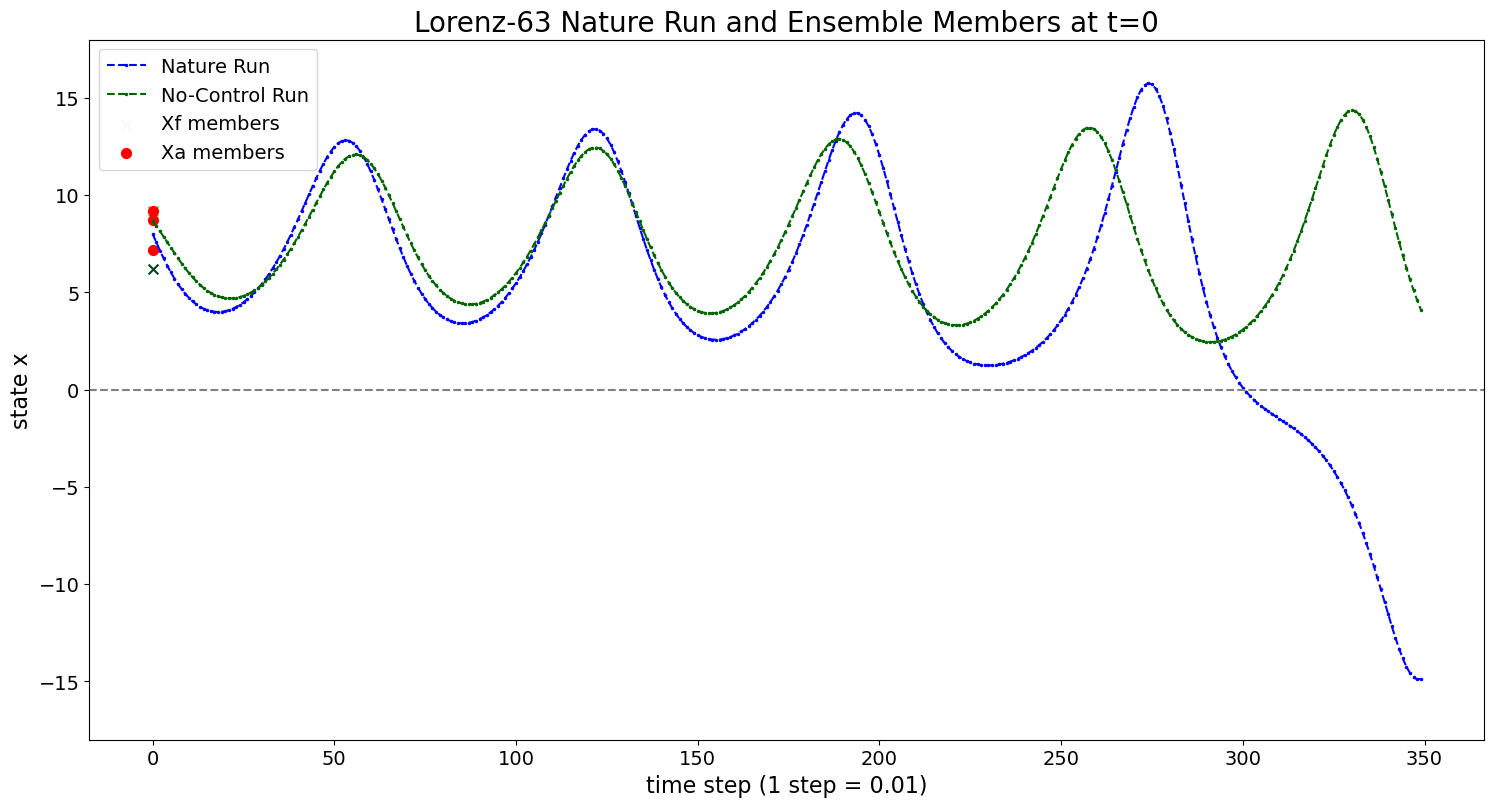

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(18, 20))
ax = fig.add_subplot(211)

# Plot nature run
plt.plot(x_nature[0, 105768:105768 + 350], linestyle='dashed', marker='.', markersize=3,
         color='blue', label="Nature Run")

# Plot no-control run
plt.plot(no_control_run[0:350, 0], linestyle='dashed', marker='.', markersize=3,
         color='darkgreen', label="No-Control Run")

# Optional: Uncomment if you want to show observations
# plt.scatter(np.arange(350), y_obs[0, 105768:105768 + 350], marker='o', s=10,
#             facecolors='none', edgecolors='red', label="Observations")

# Use greenish colormap for ensemble members
greens = cm.get_cmap('Greens', np.shape(Xf)[1])  # 3 shades of green

# Keep track of legend labels so they only appear once
added_labels = {"Xf": False, "Xa": False}

for member in range(Xf.shape[1]):
    xf_color = greens(member / (Xf.shape[1] - 1))  # evenly spaced green tones
    
    # Plot Xf members (forecast)
    label_xf = "Xf members" if not added_labels["Xf"] else None
    plt.scatter(0, Xf[0, member], marker='x', s=50, color=xf_color, label=label_xf)
    added_labels["Xf"] = True

    # Plot Xa members (analysis)
    label_xa = "Xa members" if not added_labels["Xa"] else None
    plt.scatter(0, Xa[0, member], marker='o', s=50, color='red', label=label_xa)
    added_labels["Xa"] = True

# Reference line
plt.axhline(y=0, linestyle='dashed', color='grey')

# Labels and title
plt.xlabel('time step (1 step = 0.01)', fontsize=16)
plt.ylabel('state x', fontsize=16)
plt.title('Lorenz-63 Nature Run and Ensemble Members at t=0', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-18, 18)
ax.legend(fontsize=14)

In [73]:
Xf.shape[1]

3

In [82]:
forward = 0 # predict xx more steps after time zero
multiple_number = 4 #this is the  parameter before To in the paper 
position = int(np.ceil(75.1*multiple_number)) #multiple of To

t = np.arange(0, 0.01 * position + forward * 0.01 + 0.001, 0.01)
t_output = t
t_diego = np.arange(0, 80, 0.01)

print(0.01 * position)
print('t_diego: ')
print(t_diego)
print(0.01 * position + forward * 0.01)
print('position: ', position) 
print('shape of t: ', np.shape(t))
print('t: ')
print(t)
print('t_output: ')
print(t_output)
 
#for k in range(das.edim): ######change range
#    xf_ens = smd.run(Xa_initial[:,k].A1, t, t_output)
#    xf_ens = xf_ens.y # xdim * #(t_output)

3.0100000000000002
t_diego: 
[0.000e+00 1.000e-02 2.000e-02 ... 7.997e+01 7.998e+01 7.999e+01]
3.0100000000000002
position:  301
shape of t:  (302,)
t: 
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 

In [85]:
t = np.arange(0, 0.01 * position + forward * 0.01 + 0.001, 0.01)
t_diego = np.arange(0, 80, 0.01)

print('t_diego: ')
print(t_diego)
print(0.01 * position + forward * 0.01)
print('shape of t: ', np.shape(t))
print('shape of t_diego: ', np.shape(t_diego))
print(0.01 * position)

t_diego: 
[0.000e+00 1.000e-02 2.000e-02 ... 7.997e+01 7.998e+01 7.999e+01]
3.0100000000000002
shape of t:  (302,)
shape of t_diego:  (8000,)
3.0100000000000002


In [89]:
np.shape(np.arange(0,0.01 * position,0.01))

(301,)